In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from IPython.display import display_html

import os

data_path = '/Users/misrakberhe/Desktop/Data Science/nano/Blog post/'

In [2]:
calendar = pd.read_csv(os.path.join(data_path, 'calendar.csv'))
listing = pd.read_csv(os.path.join(data_path, 'listings.csv'))
review = pd.read_csv(os.path.join(data_path, 'reviews.csv'))
listing2 = pd.read_csv(os.path.join(data_path, 'listings 2.csv'))

/Users/misrakberhe/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listing2[listing2.columns[listing2.isnull().mean() > 0.55]].isnull().mean()

thumbnail_url                   1.000000
medium_url                      1.000000
xl_picture_url                  1.000000
host_acceptance_rate            1.000000
neighbourhood_group_cleansed    1.000000
square_feet                     0.991327
weekly_price                    0.879460
monthly_price                   0.896183
license                         1.000000
jurisdiction_names              0.999896
dtype: float64

All these columns are pretty much empty. I'm going to drop them.

In [4]:
empty_cols = listing2.columns[listing2.isnull().mean() > 0.55]


In [5]:
listing_drop = listing2.drop(empty_cols, axis=1)
listing_drop.iloc[:,0:30]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count
0,1419,https://www.airbnb.com/rooms/1419,20181206023116,2018-12-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,...,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0
1,8077,https://www.airbnb.com/rooms/8077,20181206023116,2018-12-06,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,...,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,within a few hours,100%,f,https://a0.muscache.com/im/pictures/9a077853-c...,https://a0.muscache.com/im/pictures/9a077853-c...,Harbourfront,2.0,2.0
2,10314,https://www.airbnb.com/rooms/10314,20181206023116,2018-12-06,Union Inn II (Leslieville),We offer a private room for two with a queen b...,"The 'union inn' offers a clean, spacious room ...",We offer a private room for two with a queen b...,none,Our charming adopted home of Leslieville is a ...,...,"Toronto, Ontario, Canada",We are a couple of architects who try to make ...,within a day,100%,f,https://a0.muscache.com/im/pictures/53207530-d...,https://a0.muscache.com/im/pictures/53207530-d...,Riverdale,1.0,1.0
3,12604,https://www.airbnb.com/rooms/12604,20181206023116,2018-12-06,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,...,"Toronto, Ontario, Canada","I love travelling and exploring new places, ma...",NaN,NaN,f,https://a0.muscache.com/im/users/48239/profile...,https://a0.muscache.com/im/users/48239/profile...,The Annex,1.0,1.0
4,23691,https://www.airbnb.com/rooms/23691,20181206023116,2018-12-06,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,...,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,t,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0
5,26654,https://www.airbnb.com/rooms/26654,20181206023116,2018-12-06,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,NaN,...,"Toronto, Ontario, Canada",Welcome to Toronto! \r\n\r\nAfter our first me...,within a few hours,90%,f,https://a0.muscache.com/im/users/113345/profil...,https://a0.muscache.com/im/users/113345/profil...,Entertainment District,7.0,7.0
6,27423,https://www.airbnb.com/rooms/27423,20181206023116,2018-12-06,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",none,NaN,...,"Toronto, Ontario, Canada",I love to travel and meet new people from arou...,within a day,100%,f,https://a0.muscache.com/im/pictures/f687f58e-f...,https://a0.muscache.com/im/pictures/f687f58e-f...,Greenwood-Coxwell,1.0,1.0
7,28160,https://www.airbnb.com/rooms/28160,20181206023116,2018-12-06,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in 

In [6]:
to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_name',
          'host_location','host_thumbnail_url','host_picture_url','host_total_listings_count',
          'street','neighbourhood','city','state','market','smart_location','country_code','country',
          'calendar_last_scraped', 'experiences_offered']

In [7]:
listing_drop = listing_drop.drop(to_drop, axis=1)

In [8]:
for i in ['price', 'security_deposit', 'cleaning_fee','extra_people']:
    listing_drop[i] = listing_drop[i].replace('[\$,]', '', regex=True).astype(float)

In [9]:
final = listing_drop

In [10]:
calendar['available'] = calendar['available'].map({'f': 0, 't': 1})

In [11]:
#how many days out of the year they are booked
booked_days = pd.DataFrame(calendar['available'].groupby(calendar['listing_id']).agg('sum')).reset_index(drop=True)
booked_days.columns = ['bookings']

In [12]:
final = pd.concat([final, booked_days], axis=1)

In [13]:
tru_fal = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','require_guest_profile_picture',
'require_guest_phone_verification']

In [14]:
final = pd.concat([final,pd.get_dummies(final[tru_fal], drop_first=True)], axis=1)
final = final.drop(tru_fal, axis = 1)
final

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,cancellation_policy,calculated_host_listings_count,reviews_per_month,bookings,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,require_guest_profile_picture_t,require_guest_phone_verification_t
0,1419,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",...,strict_14_with_grace_period,1,0.17,0,0,1,1,0,0,0
1,8077,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,NaN,NaN,NaN,NaN,NaN,...,strict_14_with_grace_period,2,1.50,365,0,1,0,1,0,1
2,10314,Union Inn II (Leslieville),We offer a private room for two with a queen b...,"The 'union inn' offers a clean, spacious room ...",We offer a private room for two with a queen b...,Our charming adopted home of Leslieville is a ...,"Clean towels, a hair dryer, soap and sanitary ...",Our home is steps from street car and bus acce...,We have high speed wireless internet for your ...,We love meeting new people. However we do work...,...,moderate,1,0.68,361,0,1,1,0,0,0
3,12604,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,NaN,NaN,NaN,NaN,NaN,...,moderate,1,NaN,0,0,1,1,0,0,0
4,23691,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,NaN,* Laundry facilities are available at the prem...,* Public transit is conveniently located about...,NaN,You are welcome to contact us at any time if t...,...,strict_14_with_grace_period,2,1.99,358,1,1,1,1,0,0
5,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",NaN,NaN,Walk everywhere! Transit at your doorstep,NaN,NaN,...,strict_14_with_grace_period,7,0.36,351,0,1,1,0,0,0
6,27423,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",NaN,NaN,NaN,NaN,"I live upstairs, so I'm available if you need ...",...,strict_14_with_grace_period,1,0.25,0,0,1,1,0,0,0
7,28160,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in Toronto's best mid...,Simply the best and safest neighbourhood in T....,NaN,The subway is a pleasant few minute walk away ...,The entire studio apartment including lovely b...,I'm a touring musician with a house 3 hours aw...,...,strict_14_with_grace_period,1,0.18,305,0,1,0,0,0,0
8,30931,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,Artists' Home With Spectacular Views! If you w...,Split level waterfront condo with a breathtaki...,NaN,NaN,NaN,NaN,NaN,...,strict_14_with_grace_period,2,0.01,365,0,1,0,0,0,1
9,40456,Entire Suite in Downtown+Parking,NaN,-----------------IMPORTANT--------------------...,-----------------IMPORTANT--------------------...,NaN,NaN,NaN,NaN,NaN,...,strict_14_with_grace_period,3,0.97,188,1,1,0,1,0,1


In [15]:
neighbour_watch = pd.DataFrame(final['neighbourhood_cleansed'].value_counts()).reset_index()
neighbour_watch

,index,neighbourhood_cleansed
0,Waterfront Communities-The Island,3443
1,Niagara,849
2,Annex,749
3,Church-Yonge Corridor,666
4,Dovercourt-Wallace Emerson-Junction,556
5,Kensington-Chinatown,526
6,Bay Street Corridor,524
7,Little Portugal,516
8,Willowdale East,488
9,Trinity-Bellwoods,471


In [16]:
#result = set(x for l in lol for x in l)
#this will take the create a list of unique values in a column full of lists

#calendar['date'] = pd.to_datetime(calendar['date'])
#calendar['month'] = calendar['date'].dt.to_period('M')

In [17]:
def profit_bookings_price(df, neighbourhood):
    if type(neighbourhood) is str:
        #for showing one neighbourhood at a time
        df = df[df.neighbourhood_cleansed == neighbourhood]
    else:
        #for comparing neighbourhoods
        df = df[df.neighbourhood_cleansed.isin(neighbourhood)]
    profit = (df['bookings'] * df['price'])
    
    sns.set(rc={'figure.figsize':(10,6)})
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.scatterplot(y=profit[profit < 300000], x=df['price'][df['price'] < 400], hue=df['neighbourhood_cleansed'], legend=False, ax=ax1, s=10).set_title(neighbourhood)
    sns.scatterplot(y=profit[profit < 300000], x=df['bookings'],hue=df['neighbourhood_cleansed'], legend=False, ax=ax2, s=10)
    
    sns.regplot(y=profit, x=df['price'], scatter=False, ax=ax1)
    sns.regplot(y=profit, x=df['bookings'], scatter=False, ax=ax2)
    

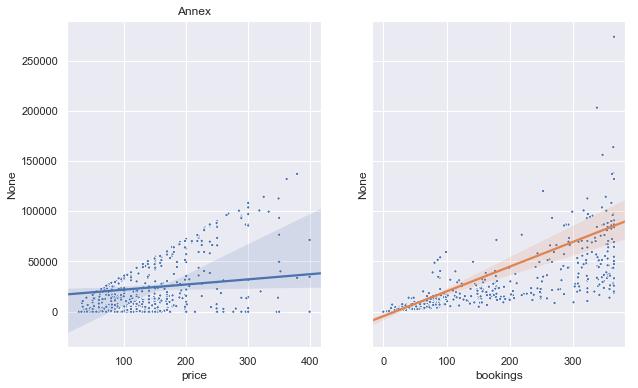

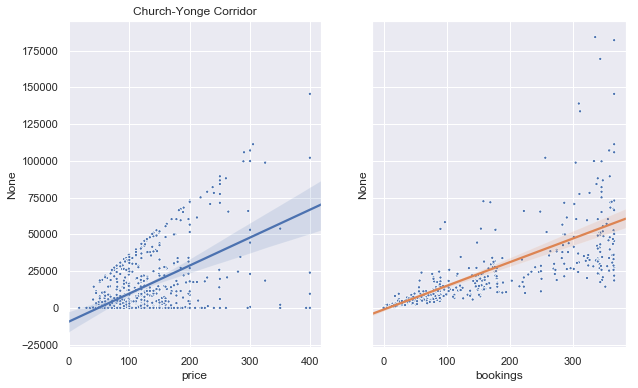

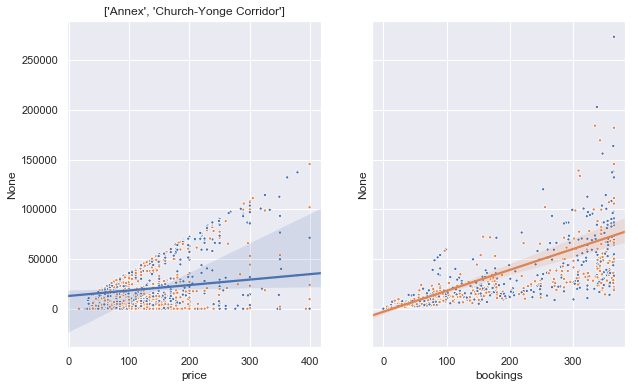

In [18]:
size = ['Annex','Church-Yonge Corridor']
largest = 'Waterfront Communities-The Island'

#look at profit per neighbourhood
for i in size:
    plt.figure(i)
    profit_bookings_price(final, i)
profit_bookings_price(final, size)

Trying to discover the most profitable pricing per night shows that there is definitely a larger pattern in the data. There are striations of lines where people are pricing very near each other. The problem with these lines is that there is a problem with the neighbourhood boundaries in some cases, they are quite large. 

We can clearly see that the Annex and the Church-Yonge Corridor have different price ranges with different variabilities, but **would comparing two different neighbourhoods really matter to someone whose AirBnB is in one neighbourhood and not another?**

### Neighbourhoods are not always homogenous with the types of housing!



Points of interest can concentrated or dispersed within that neighbourhood, you can see this below especially with the neighbourhood with the largest amount of AirBnB's, taken from InsideAirBnB.com.

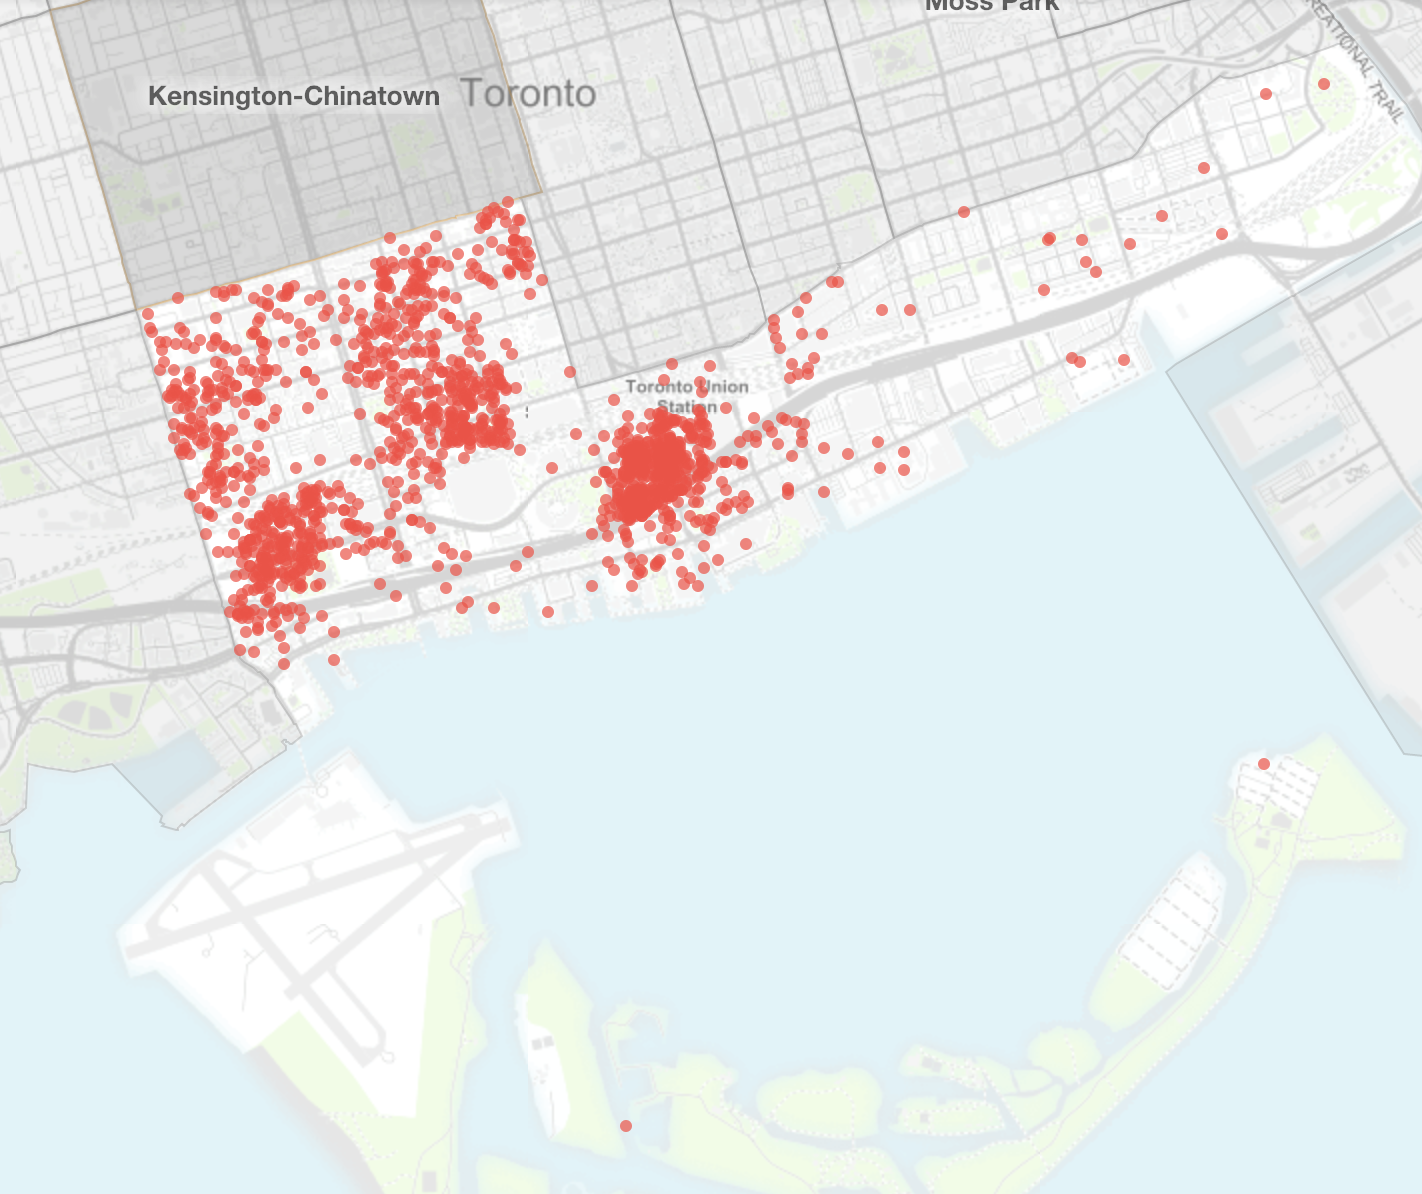

There are multiple clusterings of residences, e.g. is that many are directly clustered around the CN Tower, The Convention Centre, and Union Station, major points of congregation for people who are from out of town. Each clustering would have its own pricing, especially since many of the clusters are newly built residences, at least for this neighbourhood. Other neighbourhoods may have a mix of older and newer residences, and even between neighbourhoods that encompass both higher income and lower income areas.

We can see that there might possibly be a pattern in the graph below. We maybe able to find clusters within neighbourhoods that will inform us on the optimal pricing.


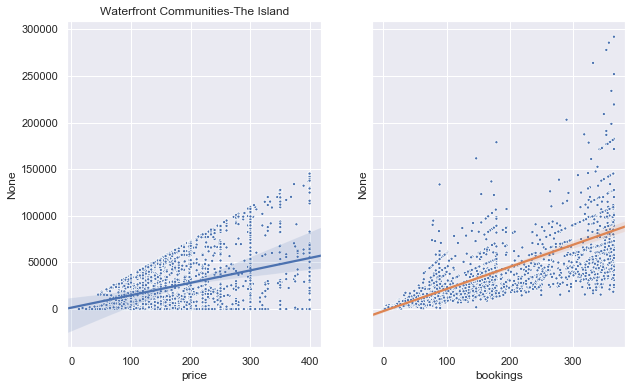

In [19]:
profit_bookings_price(final, largest)

I will group clusters of residences together using KMeans from sklearn and the longitude/latitude information and then compare them. 

**According to InsideAirBnB.com, AirBnb's location information is anonymized in the method below:**

Location information for listings are anonymized by Airbnb.
1. In practice, this means the location for a listing on the map, or in the data will be from 0-450 feet (150 metres) of the actual address.
2. Listings in the same building are anonymized by Airbnb individually, and therefore may appear "scattered" in the area surrounding the actual address.*


In [20]:

def cluster_neigh(df, neighbourhood, k):
    '''
    This function clusters the neighbourhoods AirBnB's to look at the residences in the area. Often in Toronto,
    there are newer condominums in the same area as older buildings, or the neighbourhoods are large enough to consist
    of multiple smaller but distinct neighbourhoods.
    
    Input: DataFrame, and the string of the neighbourhood name.
    
    Output: A scatter plot of the neighbourhoods residence clusters and the DataFrame with the cluster labels 
        sorted by frequency attached. 
        
    Usage: The KMeans algorithm n_clusters needs to be adjusted per neighbourhood at the judgment of
        what is constituting a residence cluster. 
    
    
    '''
    
    data = df[df.neighbourhood_cleansed == neighbourhood]
    lat_lon = data[['latitude', 'longitude']]
    
    clustering = KMeans(n_clusters=k).fit(lat_lon)
    
    #clustering = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state=0).fit(lat_lon)
    
    spec_cluster = pd.DataFrame(clustering.labels_, columns= ['cluster'], index=lat_lon.index)
    
    print (spec_cluster['cluster'].value_counts())
    
    #reordering the cluster number to match frequencies 
    lol = spec_cluster['cluster'].value_counts().reset_index().reset_index()
    value = lol['level_0'] 
    key = lol['index']
    muahaha = dict(zip(key, value))
    
    spec_cluster = spec_cluster['cluster'].map(muahaha)
    
    print (muahaha)
    
    final_clustered = pd.concat([data, spec_cluster],axis=1)
    
    sns.scatterplot(data=final_clustered,x='longitude', y='latitude',  hue='cluster', size=5, palette= sns.color_palette("dark", n_colors=k)).set_title(neighbourhood + "'s Clusters")
    
    return final_clustered
    

In [21]:
def cluster_profit_price_booking(df, to_compare):
    '''
    This function will show the seperate cluster(s) on a graph, with a regression line. 
    
    Input: DataFrame and list of which clusters to compare, taken from cluster_neigh function.
    
    Output: Graphs, showing profit related to booking and price.
    
    '''
    
    
    if len(to_compare) == 1:
        #for showing one cluster at a time
        df = df[df.cluster == to_compare]
    else:
        #for comparing neighbourhoods
        df = df[df.cluster.isin(to_compare)]
    profit = (df['bookings'] * df['price'])
    
    neighbourhood = df['neighbourhood_cleansed']
    
    sns.set(rc={'figure.figsize':(10,6)})
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    
    sns.scatterplot(y=profit[profit < 300000], x=df['price'][df['price'] < 400], hue=df['cluster'], palette= sns.color_palette("Set2", n_colors=len(to_compare)), legend='brief', ax=ax1, s=10).set_title(df['neighbourhood_cleansed'].iloc[0])
    sns.scatterplot(y=profit[profit < 300000], x=df['bookings'],hue=df['cluster'], palette= sns.color_palette("Set2", n_colors=len(to_compare)),legend='brief', ax=ax2, s=10)
    
    for i in to_compare:
        sns.regplot(y=profit[df.cluster == i], x=df['price'][df.cluster == i], scatter=False, label=i, ax=ax1)
        ax1.legend(loc="best")
        sns.regplot(y=profit[df.cluster == i], x=df['bookings'][df.cluster == i], scatter=False,label=i, ax=ax2)
        ax2.legend(loc="best")

2    1170
0    1023
1     692
4     455
3     103
Name: cluster, dtype: int64
{2: 0, 0: 1, 1: 2, 4: 3, 3: 4}


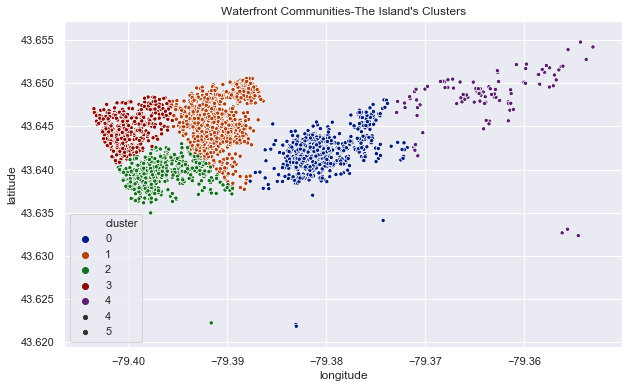

In [22]:
waterfront_clusters = cluster_neigh(final, largest,5)

Its plain to see the advantage in looking at the neighbourhoods in this particular way. I'm going to examine a different neighbourhood, the Church-Yonge Corridor, one of the other popular areas for AirBnB's. 

0    190
2    145
1    104
3    102
5     81
4     44
Name: cluster, dtype: int64
{0: 0, 2: 1, 1: 2, 3: 3, 5: 4, 4: 5}


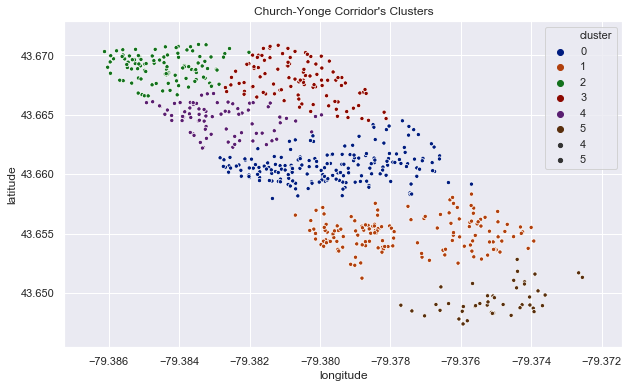

In [23]:
final_clustered = cluster_neigh(final, 'Church-Yonge Corridor', 6)


## Do the neighbourhood clusters have different pricing?

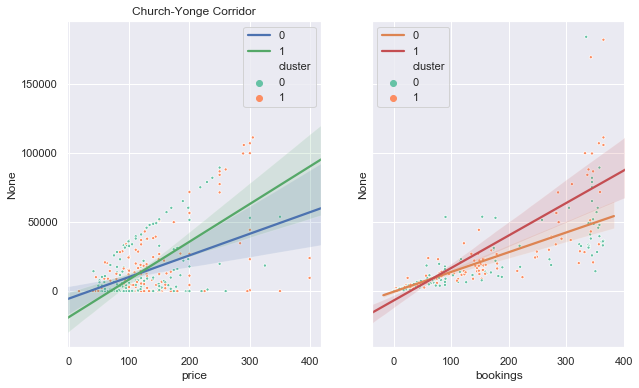

In [24]:
cluster_profit_price_booking(final_clustered, [0,1])


Looking at the above graphs, the 0 and 1 clusters, which are the biggest for the Church-Yonge corridor, have different price ranges in the lower price ranges where most AirBnB owners operate at. At the higher ranges, there are too few points to say anything definitive but I think this shows that are definitely different price ranges for different parts of a neighbourhood.

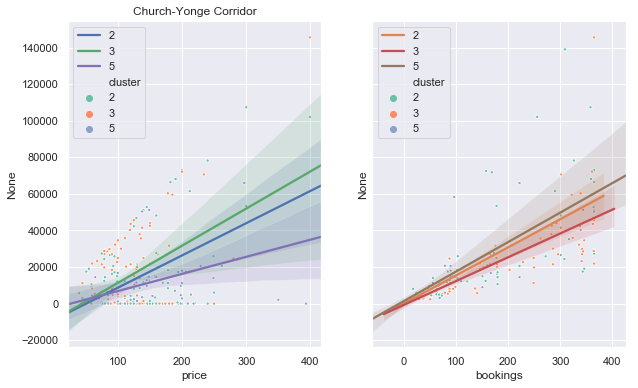

In [25]:
cluster_profit_price_booking(final_clustered, [2,3, 5])

Another look, I compared the two most northern clusters with the one further south and you can see the difference. I know for a fact that there are many new condo's that went up in the last couple years in cluster 2 and 3 (I can see them from my window) and that would explain their steeper regression lines. Cluster 5 is deep downtown, there are condos going up there as well (if my memory is correct), but there isn't the same amount of space to put up the mega condos that are in/going up in cluster 2 and 3. 

## Now that I can see how much money I can make, should I set my price to $xx.xx?

Not just yet! Every AirBnb listing tells the AirBnB user what features that accompany the price. We need to figure out which features demand a higher price that customers are willing to pay. To find this out, I'm going to model the data with a Linear Regression.

In [26]:
def neigh(neighbourhood):
    '''
    This function is only necessary when trying to look at a city wide analysis. Other wise on a neighbourhood
    by neighbourhood basis, its useless.
    
    This function is to provide a numerical value of the neighbourhoods,
    I've ordered them from highest amount of AirBnB's to lowest, so that there is some meaning when I
    apply the Linear Regression model.
    
    '''
    
    code = neighbour_watch.index[neighbour_watch['index'] == neighbourhood][0]
    
    return code


In [91]:

def clean_for_regression(df):
    
    vfunc = np.vectorize(neigh)
    vfunc(df['neighbourhood_cleansed'])
    
    df['neighbourhood_cleansed_cat'] = vfunc(df['neighbourhood_cleansed'])
    
    #this creates the dummies for the amenities columns
    lol = df['amenities'].replace('[\{"}]', '',regex=True).str.split(',')
    amenities = pd.get_dummies(lol.apply(pd.Series).stack()).sum(level=0)
    
    #dropping amenities that appear in less than 20% of rows
    outlier_amenities = amenities.columns[amenities.sum() < (len(df) * 0.2)]
    amenities = amenities.drop(outlier_amenities, axis=1)
    
    final2 = pd.concat([df, amenities], axis=1)

    #fill numbered columns with median values
    for col in final2.select_dtypes(include=np.number):
        final2[col] = final2[col].fillna(final2[col].median())

    #looking for other columns with values missing    
    deal_withna = final2[final2.columns[final2.isnull().mean() > 0]]
    
    #changing dates to datetime
    host_and_reviews = ['host_since', 'first_review', 'last_review']
    for col in host_and_reviews:
        final2[col] = pd.to_datetime(final2[col])
        
    
    #turning rates into percentages, filling NaN's with the mean amount
    host_response = pd.get_dummies(final2['host_response_time'],dummy_na=True)
    final2['host_response_rate'] = final2['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
    final2['host_response_rate'] = final2['host_response_rate'].fillna(final2['host_response_rate'].mean())

    #pulling the character lenght of these descriptions, the originals could be used for NLP
    for i in ['summary', 'description', 'house_rules', 'notes']:
        final2[i] = len(final2[i].fillna(0))

    room_bed_cancel = ['room_type', 'bed_type', 'cancellation_policy']
    hmm = pd.get_dummies(final2[room_bed_cancel], drop_first=True)

    deal_withna.loc[:, deal_withna.dtypes != 'datetime64[ns]']
    final2 = final2.drop(deal_withna.columns[deal_withna.dtypes != 'datetime64[ns]'] , axis=1)
    final2 = pd.concat([final2, host_response, hmm], axis=1)

    final3 = final2.dropna()
    print ("Number of columns with nulls: {}".format(final3.isnull().any().sum()))
    #
    final3 = final3.drop(final3.columns[final3.dtypes == 'object'],axis=1)
    final3 = final3.drop(final3.columns[final3.dtypes == 'datetime64[ns]'],axis=1)
    
    print (final3['price'].hist())
    
    #taking the outliers out of the data
    final3 = final3[final3['price'] < 350]
    
    print (final3['price'].hist())
    print ("Removing outliers....")
    
    return final3

Number of columns with nulls: 0
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Removing outliers....


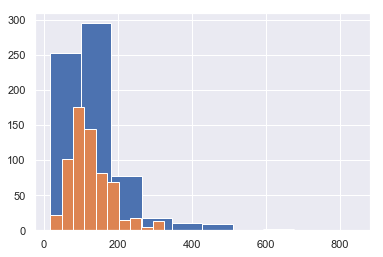

In [92]:
final_cleaned = clean_for_regression(final_clustered)

# Linear Regression Time

In [93]:
def regression(df, clusters):
    
    linearprice = LinearRegression()
    linearbooking = LinearRegression()
    
    #select which cluster you want to examine

    df = df[df['cluster'] == clusters]
    
    y_price = df['price']
    y_booking = df['bookings']

    linearprice.fit(df.drop('price', axis=1), y_price)
    linearbooking.fit(df.drop('bookings', axis=1), y_booking)
    
    y_pred_price = linearprice.predict(df.drop('price', axis=1))
    y_pred_booking = linearbooking.predict(df.drop('bookings', axis=1))
    
    price_coefs = list(zip(linearprice.coef_, df.drop('price', axis=1)))
    booking_coefs = list(zip(linearbooking.coef_, df.drop('bookings', axis=1)))
    
    return price_coefs, booking_coefs

In [94]:
price, booking = regression(final_cleaned, 0)

In [95]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


In [98]:
display_side_by_side(pd.DataFrame(price).sort_values(by=0, ascending=False)[:40],pd.DataFrame(price).sort_values(by=0, ascending=False)[39:80], pd.DataFrame(price).sort_values(by=0, ascending=False)[80:])

,0,1
3,1.265381e+03,latitude
83,7.398517e+01,bed_type_Couch
67,6.281437e+01,Refrigerator
6,3.349926e+01,bathrooms
40,3.147817e+01,Cable TV
60,2.946160e+01,Kitchen
77,2.804967e+01,within a day
49,2.560161e+01,Extra pillows and blankets
34,2.361335e+01,require_guest_profile_picture_t
35,2.361335e+01,require_guest_phone_verification_t


## How do the features contribute to price?

There is a lot to see here. 

There are many of the amenities in these lists and some high values at the start. The large latitude and longitude values make sense, an increase of 1 degrees in latitude is outside the city. What the value tells us is that as you move north, the price increases. 

If it's an amenity, if the listing says that the unit has it, that will be how much the price usually goes up.

Things like for every bathroom, the price increases by $33, or that the price increases by $8.78 for every person it accomodates makes sense, bigger AirBnB's will demand a larger price by default.

There are some strange semantic relations. While 'Cooking basics' drops price by $44, "Dishes and Silverware" increases price by $13. Saying 'Stove' is better than 'Oven', 'WiFi' better than 'Internet'. Referring to what was said on this Kaggle post (https://www.kaggle.com/residentmario/modeling-prices), this maybe due to the social status signals that are being sent out. 

I'd agree with that assessment, and going a step further, it may be that "hotel" words are positive and "house" words are negative. People expect a level of service with AirBnB's despite the original idea that they are supposed to be people letting you live in their homes for a short stay, yet its expected that you are sold the idea of a well-furnished hotel suite. I believe that this is shown by the price drop due to stating 'Heating' as an amenity, heating is something you think about when you are at home, not at a hotel. 

### What is the takeaway?

Putting the best foot forward is the takeaway here. Its impossible to control your location unless you have a lot of money, so telegraphing how 'hotel' like your AirBnB is where you need to start. You don't want people thinking they are going to sleep in someone elses home. You have to do everything you can to avoid signalling that. 
    
    
    

In [108]:
pd.DataFrame(booking).sort_values(by=0)

,0,1
49,-2.261564e-10,Extra pillows and blankets
30,-2.117764e-10,host_is_superhost_t
5,-1.898074e-10,accommodates
53,-1.890408e-10,Gym
34,-1.747276e-10,require_guest_profile_picture_t
35,-1.747276e-10,require_guest_phone_verification_t
79,-1.718258e-10,within an hour
58,-1.696366e-10,Internet
22,-1.566896e-10,review_scores_accuracy
42,-1.241897e-10,Coffee maker


## Are there amenities that garner more bookings?

There was no relation to how many bookings an AirBnB rental has in the coming year. There might be a number of reasons why the data isn't showing this. One reason might be that since this data is a snapshot from early December, there aren't many events that would bring tourists to Toronto. Summer is the best time to come to the city and it might be better to look at the data coming from closer to the summer season, when people maybe booking more in preparation.

Another reason might be that the booking data is too messy still. A thought on how to clean it better might be to seperate the dates that each place has a booking. The issue with making the dates more granular is that there will be ranges or times of the year that will be difficult to represent in a column unless I'm willing to balloon the size of the dateframe by an additional 365 columns. 

Another thought about this dataset (and the archived versions) is that it might not be entirely good for any deep analysis of booking information. There is a large chance (and I believe there is) that between the times when data is pulled, we are missing a large amount of booking information. Which would make the data related to bookings less reliable and harder to tie to the amenities.


The three questions I'm going to ask are:

1. 'What is the pricing for Airbnb's in Toronto?'
2. 'What the most advantageous availabliity?'
3. 'Are there amenities that garner more bookings?'